## AMAZON REVIEWS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Grab and process the raw data.
reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/amazon_cells_labelled.txt", delimiter = '\t')
reviews_raw.columns = ['review', 'positive']
reviews_raw['positive'] = (reviews_raw['positive'] == 1)

In [3]:
reviews_raw.head()

,review,positive
0,"Good case, Excellent value.",True
1,Great for the jawbone.,True
2,Tied to charger for conversations lasting more...,False
3,The mic is great.,True
4,I have to jiggle the plug to get it to line up...,False


In [4]:
keywords = ['good','like','best','easy','nice','great','perfect','recommend', 'easier','love'
            ,'Beautiful',' satisfied','must have', 'happy','brilliant','well made','adorable','excellent'
           ,'priced right','quickly','comfort','sturdy','seamless','helpful','superb','tremendous','best','bargain',
            'waste','fool','do not buy','poor','disappoint',' impressed','keen','ideal','winner','favorite','no problem',
            'works well','happy','Incredible','wonderful','not good','breaks','cheap','terrible','not','better']

#pleased ~ happy

for key in keywords:
    reviews_raw[str(key)] = reviews_raw.review.str.contains(
        str(key),
        case=False
    )

target = reviews_raw['positive']

In [5]:
reviews_pos = reviews_raw.query('positive == True ')
reviews_neg = reviews_raw.query('positive == False ')

reviews_pos[50:100]  # Just look at positive reviews for some ideas for my keywords
reviews_neg[40:100]

,review,positive,good,like,best,easy,nice,great,perfect,recommend,...,no problem,works well,Incredible,wonderful,not good,breaks,cheap,terrible,not,better
83,"This item worked great, but it broke after 6 m...",False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
86,The construction of the headsets is poor.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89,For a product that costs as much as this one d...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
92,The ear buds only play music in one ear.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,Dont waste your money...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95,If you plan to use this in a car forget about it.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,I found this product to be waaay too big.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,I'm very disappointed with my decision.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,"Buyer Beware, you could flush money right down...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,I received my supposedly new motorola 375 and ...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


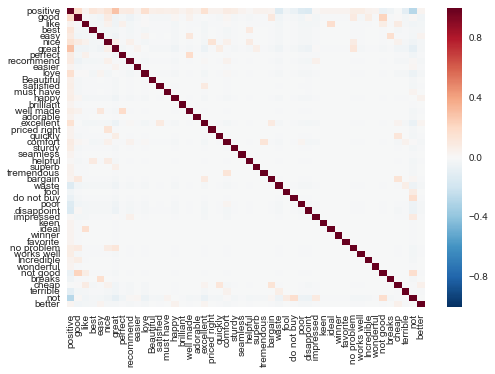

In [6]:
sns.heatmap(reviews_raw.corr())
plt.show()

Looks like none of my words are strongly correlated with another. With independent variables, I know the Bernoulli classifier should work well.

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
data = reviews_raw[keywords]
bnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 195


The accuracy of my model is = 1 - 195/999 = 80.5%

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)
# NOTE - this is where I fixed my labels for the confusion matrix :)

                # Predicted
#Actual        False         True
#False      True Neg        False Pos
#True         False Neg      True Pos

array([[466,  33],
       [162, 338]])

In [9]:
df = reviews_raw.query('positive == False') 
df.shape[0]

499

In [10]:
print('False Positive')   # I predict it positive but it's not
print(33/(499))
# this is when they use a "this is NOT good" type of sentiment

False Positive
0.06613226452905811


In [11]:
print('False nEGATIVE')   # It's positive but I didn't predict that
print(162/(500))

False nEGATIVE
0.324


It's just like me to look for the two ways I have FAILED, so I will provide here the SENSITIVITY & SPECIFITY of my awesome model.

In [12]:
#Sensitivity - True Positive Rate - to rule a condition OUT
print("Sensitivity:")
print(338/500)

#Specificity - True Negatives Rate - to rule a condition IN
print("Specifity:")
print(466/499)

Sensitivity:
0.676
Specifity:
0.9338677354709419


In [13]:
reviews_raw['y_pred'] = y_pred

In [14]:
validate = reviews_raw[['review','positive','y_pred']]
validate_bad = validate.query('positive == True & y_pred == False')
validate_bad.head(270)

,review,positive,y_pred
10,He was very impressed when going from the orig...,True,False
22,I have yet to run this new battery below two b...,True,False
35,It has kept up very well.,True,False
44,It has all the features I want,True,False
50,good protection and does not make phone too bu...,True,False
51,A usable keyboard actually turns a PDA into a ...,True,False
54,Everything about it is fine and reasonable for...,True,False
79,I wear it everyday and it holds up very well.,True,False
81,"Well packaged, arrived on time, and works as i...",True,False
88,The phone loads super!,True,False


In [15]:
validate_bad2 = validate.query('positive == False & y_pred == True')
print(validate_bad2)

                                                review positive y_pred
82                      The battery runs down quickly.    False   True
83   This item worked great, but it broke after 6 m...    False   True
89   For a product that costs as much as this one d...    False   True
115  i got this phone around the end of may and i'm...    False   True
143  The phone takes FOREVER to charge like 2 to 5 ...    False   True
159  All I can do is whine on the Internet, so here...    False   True
176  I put the latest OS on it (v1.15g), and it now...    False   True
178  If you like a loud buzzing to override all you...    False   True
216  I also didn't like the "on" button, it felt li...    False   True
220  It's kind of embarrassing to use because of ho...    False   True
227  I have had this phone for over a year now, and...    False   True
285          I wouldn't recommend buying this product.    False   True
320  I ordered this product first and was unhappy w...    False   True
325  H

# Cross-Validation

In [32]:
#Make 5 folds
val1, val2, val3, val4, val5 = np.split(reviews_raw.sample(frac=1), [int(.2*len(reviews_raw)), int(.4*len(reviews_raw)),int(.6*len(reviews_raw)),int(.8*len(reviews_raw))])

In [33]:
test = val1
rest = [val2,val3,val4,val5]
train = pd.concat(rest)

In [35]:
data = train[keywords]
data2 = test[keywords]
target = train['positive']
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} test points in {} : {}".format(
    data2.shape[0],'val1',
    (test['positive'] != y_pred).sum()
))

Number of mislabeled points out of a total 199 test points in val1 : 39


In [37]:
test = val2
rest = [val1,val3,val4,val5]
train = pd.concat(rest)

data = train[keywords]
data2 = test[keywords]
target = train['positive']
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} test points in {} : {}".format(
    data2.shape[0],'val2',
    (test['positive'] != y_pred).sum()
))

Number of mislabeled points out of a total 200 test points in val2 : 39


In [38]:
test = val3
rest = [val1,val2,val4,val5]
train = pd.concat(rest)

data = train[keywords]
data2 = test[keywords]
target = train['positive']
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} test points in {} : {}".format(
    data2.shape[0],'val3',
    (test['positive'] != y_pred).sum()
))

Number of mislabeled points out of a total 200 test points in val3 : 51


In [39]:
test = val4
rest = [val1,val2,val3,val5]
train = pd.concat(rest)

data = train[keywords]
data2 = test[keywords]
target = train['positive']
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} test points in {} : {}".format(
    data2.shape[0],'val4',
    (test['positive'] != y_pred).sum()
))

Number of mislabeled points out of a total 200 test points in val4 : 45


In [40]:
test = val5
rest = [val1,val2,val3,val4]
train = pd.concat(rest)

data = train[keywords]
data2 = test[keywords]
target = train['positive']
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} test points in {} : {}".format(
    data2.shape[0],'val5',
    (test['positive'] != y_pred).sum()
))

Number of mislabeled points out of a total 200 test points in val5 : 41


In [41]:
#So my results for my 5 folds were: 39, 39, 51,  45,  41
err = [39, 39, 51,  45,  41]
avg_error = np.mean(err)
print(avg_error)
sd_error = np.std(err)
print(sd_error)

43.0
4.5607017004


# Try another distribution _ Gaussian

In [16]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [17]:
# Fit our model to the data.
data = reviews_raw[keywords]
gnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = gnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 356


In [18]:
# Bernoulli was better

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [20]:
# Fit our model to the data.
data = reviews_raw[keywords]
mnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = mnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 347


In [21]:
# Bernoulli was better than Multinomial, but similar to Gaussian

In [22]:
# Try this model on another dataset: yelp

## Yelp dataset

In [23]:
# Grab and process the raw data.
yelp_reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/yelp_labelled.txt", delimiter = '\t')
yelp_reviews_raw.columns = ['review', 'positive']
yelp_reviews_raw['positive'] = (yelp_reviews_raw['positive'] == 1)

In [24]:
for key in keywords:#Using keywords from above
    yelp_reviews_raw[str(key)] = yelp_reviews_raw.review.str.contains(
        str(key),
        case=False
    )

target = yelp_reviews_raw['positive']

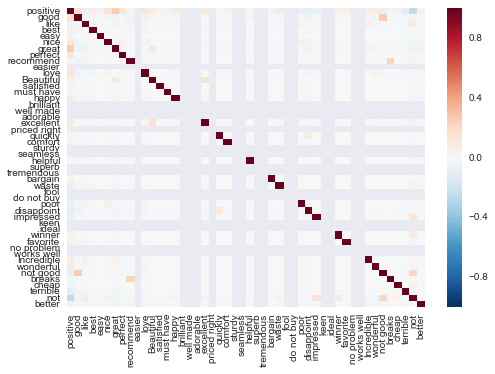

In [25]:
sns.heatmap(yelp_reviews_raw.corr())
plt.show()

You can see that some of my words aren't in the dataset. A few more of these are correlated, such as "beautiful" & "excellent". This may impact the model but will leave for now.

In [26]:
# Fit our model to the data.
data_yelp = yelp_reviews_raw[keywords]
bnb.fit(data_yelp, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_yelp)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 282


This is almost double the error compared to the Amazon dataset, some of the features are not relevant

## IMBD database

In [27]:
# try on the IMBD database
# Grab and process the raw data.
i_reviews_raw = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/imdb_labelled.txt", delimiter = '\t')
i_reviews_raw.columns = ['review', 'positive']
i_reviews_raw['positive'] = (i_reviews_raw['positive'] == 1)

In [28]:
for key in keywords:#Using keywords from above
    i_reviews_raw[str(key)] = i_reviews_raw.review.str.contains(
        str(key),
        case=False
    )

target = i_reviews_raw['positive']

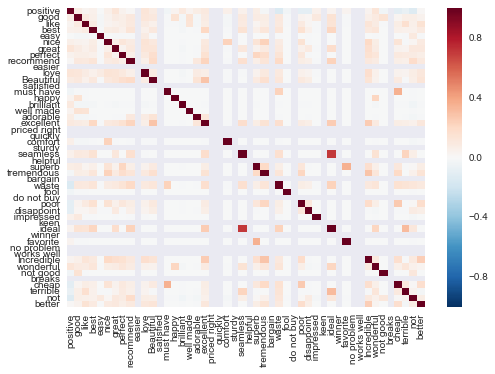

In [29]:
sns.heatmap(i_reviews_raw.corr())
plt.show()

In [30]:
# Fit our model to the data.
data_i = i_reviews_raw[keywords]
bnb.fit(data_i, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_i)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_i.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 747 points : 251


This model didn't work that well - more errors with fewer data points

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.